In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../module/')

import keras2
from keras2.models import Model
from keras2.layers import concatenate, Dense, Input, Flatten
from keras2.optimizers import Adam
from util import moving_average, dlqr, discretized_system, lqr
import gym2
from rl2.agents import sampleDDPGAgent
from rl2.memory import SequentialMemory

Using TensorFlow backend.
Using TensorFlow backend.


In [2]:
# GymのPendulum環境を作成
env = gym2.make("Pendulum-v2")

# 取りうる”打ち手”のアクション数と値の定義
nb_actios = 2
ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

In [3]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(1, activation="multiple_tanh")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape , s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = sampleDDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        clip_com = 0.01
    )
    return agent

In [4]:
#safe learning
step = 300000
episode_step = 500 # 入力が加えられる回数を200(dt=0.05)にする
a = agent((1,), (2,))
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mae"])
# a.load_weights('../learned_models_vol2/0.5standup-agent.h5')
# a.load_weights('../../learned_models_stab/lqr_optimal_agent.h5')
a.actor.load_weights('./saved_agent/sample_value.h5')
# a.fit(env, nb_steps=step, visualize=0, verbose=1, nb_max_episode_steps=episode_step)

In [5]:
# a.load_weights('../../learned_models_stab/lqr_optimal_agent.h5')
a.test(env, visualize=0, nb_max_episode_steps=episode_step, tau=0.05)

Testing for 1 episodes ...
Episode 1: reward: -238.347, steps: 500


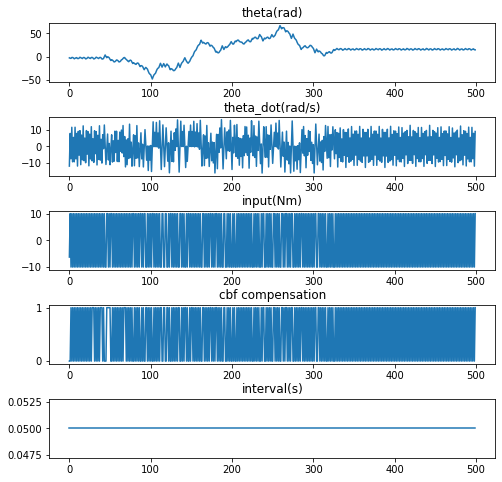

In [6]:
titles = ['theta(rad)', 'theta_dot(rad/s)', 'input(Nm)', 'cbf compensation', 'interval(s)'] 
history = a.data_log[0]
x_axis = range(history.shape[0])
plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(history.shape[1]):
    data = history[:,i]
    plt.subplot(history.shape[1],1,i+1)
    plt.title(titles[i])
    plt.plot(x_axis, data)
plt.show()

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

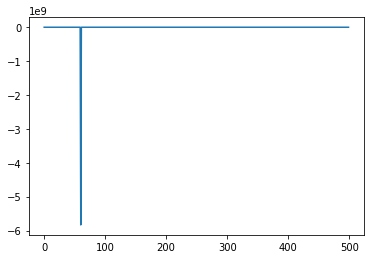

In [7]:
print(a.data_log[0][:,3])
plt.plot(range(500), a.data_log[0][:,2])
plt.show()

[3.3209417]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[10.]
[-10.]
[-10.]
[10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[10.]
[-10.]
[-10.]
[10.]
[-10.]
[10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]
[-10.]
[10.]


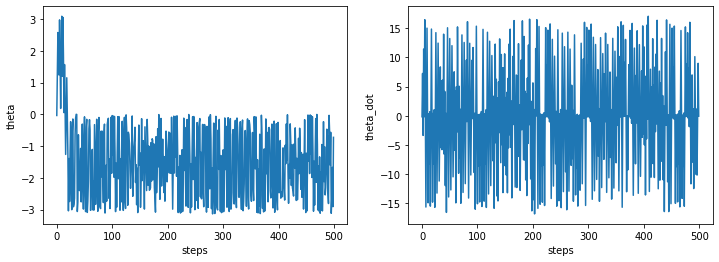

In [7]:
from rl2.barrier_certificate import u_cbf

def rad_clip(th):
    r = abs(th)
    while r > np.pi:
        r -= np.pi
    th = np.sign(th) * r
    return th

env.reset()
states = []
tau = 0.5
action_repetition = int(np.ceil(200 * tau))  # minimum natural number which makes `dt` smaller than 0.005
dt = tau / action_repetition

for i in range(500):
    x = env.state
    states.append([rad_clip(x[0]), x[1]])
    a_agent = a.forward(x)
    action = u_cbf(x, a_agent[0])
    print(action)
    for p in range(action_repetition):
        _,_,_,_ = env.step(action, dt, tau)
states = np.array(states)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.xlabel('steps')
plt.ylabel('theta')
plt.plot(range(states.shape[0]), states[:,0])
plt.subplot(1,2,2)
plt.xlabel('steps')
plt.ylabel('theta_dot')
plt.plot(range(states.shape[0]), states[:,1])
plt.show()

In [31]:
print(a.layers[2].get_weights())
# LQRの重みだけ大きすぎて、他の重みが同じような計算しかしなくなってる

[array([[-28.297367 , -12.686128 ,   2.0184715, -12.116467 ,   1.3082124,
         -2.0920644,  -1.4304147, -11.483301 , -12.740752 ,  -1.2749327,
        -11.44544  ,   1.5493363, -11.5596075, -11.343975 ,   1.0937897,
         -9.5850725],
       [-18.488373 , -13.087474 ,  13.693337 , -14.920063 ,  13.383248 ,
         13.609487 ,  12.780988 , -13.723577 , -14.023649 ,  14.918157 ,
        -12.142086 ,  14.092659 , -13.605753 , -12.32055  ,  12.592451 ,
        -10.524256 ]], dtype=float32), array([-10.692174 ,   6.0615435,  13.134604 ,   6.743981 ,  11.926516 ,
        12.929572 ,  11.344387 ,  13.319799 ,   6.1276007,  13.684137 ,
        13.422931 ,  12.646855 ,  13.644454 ,   5.9768076,  13.331561 ,
         4.9235168], dtype=float32)]


In [29]:
x = np.array([0., 0.])
print(a.forward(x))

[-10.]


In [5]:
print(np.zeros((10,1)))
print(np.zeros((10,)))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
